# Trabajo Final | Data Science | Coderhouse
# Análisis dataframes KPI jugadores NBA y salarios 

<img src=https://1000marcas.net/wp-content/uploads/2019/12/NBA-Logo.png alt="drawing" width="200"/>

## Abtract

Se analizará un dataframe, compuesto por dos dataframe diferentes, el primero contiene estadisticas sobre el desempeño de los jugadores de basketball de la NBA promediados por tempoarada  y el segundo tiene los contratos anuales de cada jugador.
## Objetivos
Se buscará agrupar los jugadores mediante un algoritmos de clustering
Buscar la relación entre los KPI y sus salarios
Predecir en que escalon de salario debería estar un jugador de acuerdo a sus indidicadores de perfomance

## Origen de datos

### Dataset demografíco y estadísticas de jugadores
https://www.kaggle.com/datasets/justinas/nba-players-data

El conjunto de datos contiene más de dos décadas de datos sobre cada jugador que ha sido parte de la lista de equipos de la NBA. Captura variables demográficas como la edad, la altura, el peso y el lugar de nacimiento, detalles biográficos como el equipo en el que jugó, el año del draft y la ronda. Además, cuenta con estadísticas básicas de box score como partidos jugados, promedio de puntos, rebotes, asistencias, etc.<br>
<br>
### Descripción de variables importantes


| Variable      | Descripción | 
| :---        |    :---   | 
| age      | Age of the player       | 
| player_height   | Height of the player (in centimeters)        | 
| player_weight      | Weight of the player (in kilograms)       | 
| gp      | Games played throughout the season       | 
| pts      | Average number of points scored       | 
| reb      | Average number of rebounds grabbed       | 
| ast      | Average number of assists distributed      | 
| net_rating      | Team's point differential per 100 possessions while the player is on the court       | 
| oreb_pcte      | Percentage of available offensive rebounds the player grabbed while he was on the floor       | 
| dreb_pct      | Percentage of available defensive rebounds the player grabbed while he was on the floor       | 
| usg_pct      | Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)       | 
| ts_pct      | Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))       | 
| ast_pct      | Percentage of teammate field goals the player assisted while he was on the floor       | 
|country | Name of the country the player was born in (not necessarily the nationality) |



### Dataset salarios de jugadores

https://data.world/datadavis/nba-salaries/workspace/file?filename=salaries_1985to2018.csv
El conjunto de datos contiene los salarios de los jugadores de la NBA. Fuente original "basketball-reference.com"
En este dataframe solo nos interesan el nombre del jugador, la temporada y el salario.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/datasets/'
df_players = pd.read_csv('all_seasons_players.csv',sep=',') #Data frame con info sobre jugadores y su desempeño en cada temporada

url = 'https://query.data.world/s/vststwtlvsy5drnvjauw52zbbierlr' 
df_salaries = pd.read_csv('Salaries_NBA.csv',sep=';') #Data frame con los salarios de jugadores en cada temporada

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/datasets


##EDA

In [ ]:
print("Players KPI -> ", df_players.shape)
print("Salaries -> ", df_salaries.shape)

Players KPI ->  (12305, 22)
Salaries ->  (11837, 7)


###EDA dataframe players KPI


1.   Head
2.   info
3.   Describe
4.   Nulos
5.   Gráficos distribución
6.   Matriz covarianza



In [ ]:
df_players.head(3)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.93392,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97


In [ ]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [ ]:
df_players.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12305.0,6152.000000,3552.291866,0.000000,3076.0000,6152.00000,9228.00000,12304.00000
age,12305.0,27.084518,4.335868,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,12305.0,200.611602,9.146321,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,12305.0,100.369926,12.477150,60.327736,90.7184,99.79024,108.86208,163.29312
gp,12305.0,51.290532,25.095909,1.000000,31.0000,57.00000,73.00000,85.00000
pts,12305.0,8.172775,5.974957,0.000000,3.6000,6.70000,11.50000,36.10000
reb,12305.0,3.559155,2.483550,0.000000,1.8000,3.00000,4.70000,16.30000
ast,12305.0,1.813986,1.794155,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,12305.0,-2.255733,12.673254,-250.000000,-6.4000,-1.30000,3.20000,300.00000
oreb_pct,12305.0,0.054473,0.043599,0.000000,0.0210,0.04100,0.08400,1.00000


In [ ]:
df_players.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

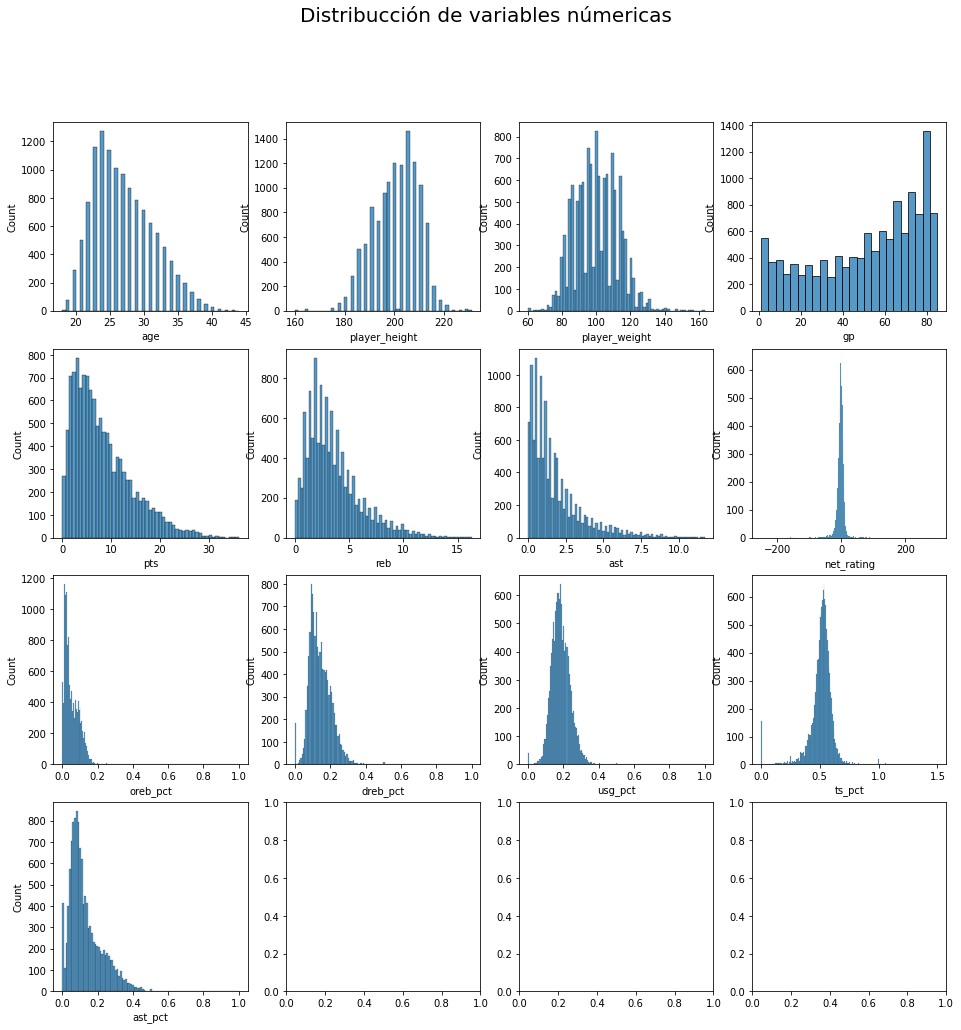

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
fig.suptitle('Distribucción de variables númericas',fontsize=20)
df_players_1 = sns.histplot(x=df_players.age, ax=axes[0,0])
df_players_2 = sns.histplot(x=df_players.player_height, ax=axes[0,1])
df_players_3 = sns.histplot(x=df_players.player_weight, ax=axes[0,2])
df_players_4 = sns.histplot(x=df_players.gp, ax=axes[0,3])
df_players_5 = sns.histplot(x=df_players.pts, ax=axes[1,0])
df_players_6 = sns.histplot(x=df_players.reb, ax=axes[1,1])
df_players_7 = sns.histplot(x=df_players.ast, ax=axes[1,2])
df_players_8 = sns.histplot(x=df_players.net_rating, ax=axes[1,3])
df_players_9 = sns.histplot(x=df_players.oreb_pct, ax=axes[2,0])
df_players_10 = sns.histplot(x=df_players.dreb_pct, ax=axes[2,1])
df_players_11 = sns.histplot(x=df_players.usg_pct, ax=axes[2,2])
df_players_12 = sns.histplot(x=df_players.ts_pct, ax=axes[2,3])
df_players_13 = sns.histplot(x=df_players.ast_pct, ax=axes[3,0])

In [ ]:
columns_string = {"player_name", "team_abbreviation" , "college" , "country" , "draft_year" ,  "draft_round" , "draft_number" , "season" }    
# DF con las columnas númericas utilizadas en el análisis
columns_num = {"age","player_height","player_weight","gp" , "pts","reb", "ast" , "net_rating", "oreb_pct", "dreb_pct" ,  "usg_pct" , "ts_pct" , "ast_pct"}
df_players_num = df_players[columns_num] #Utilizado para ver la distribución de cada variable


In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df_players_num.values)
cov_mat =np.cov(X_std.T)


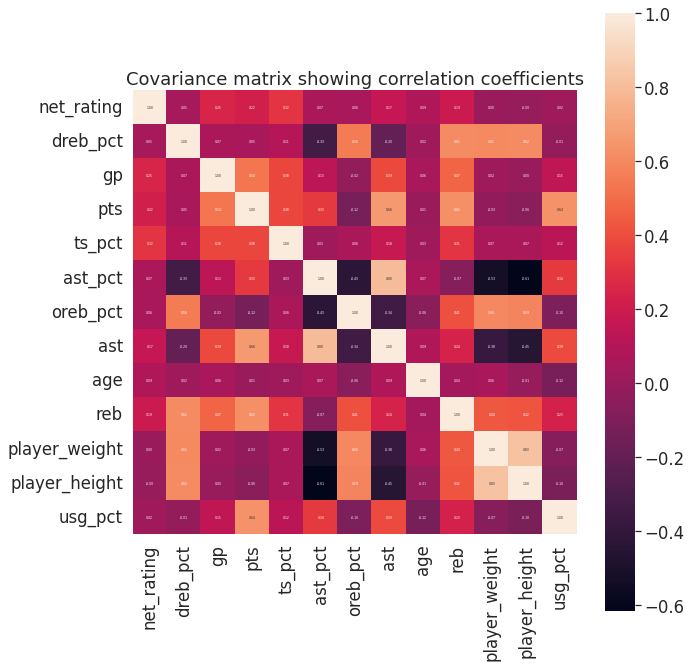

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 3},
                 yticklabels=columns_num,
                 xticklabels=columns_num)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()
# No apreciamos correlaciones altas salvo con el peso/altura de jugador y los dos indices de asistencias

### EDA Dataframe Salarios

In [ ]:
df_salaries.head(3)

,Register_Value,Player_Name,Salary,season_start,Season_End,Team,Full_Team_Name
0,1,A.C. Green,$ 1.750.000.00,1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,$ 1.750.000.00,1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,$ 1.750.000.00,1992,1993,LAL,Los Angeles Lakers


In [ ]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [ ]:
df_salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
Register_Value,11837.0,5919.000000,3417.191903,1.0,2960.0,5919.0,8878.0,11837.0
season_start,11837.0,2004.419785,8.168175,1990.0,1997.0,2005.0,2012.0,2017.0
Season_End,11837.0,2005.419785,8.168175,1991.0,1998.0,2006.0,2013.0,2018.0


In [ ]:
df_salaries.isnull().sum()

Register_Value    0
Player_Name       0
Salary            0
season_start      0
Season_End        0
Team              0
Full_Team_Name    0
dtype: int64

##Feature Engineering

1.  Quitar la variables inecesarias
2.  Unión de los dos dataframe
3.  One hot encodering para transformar variabla country en númerica
4. Creación de una variable objetivo a partir del salario





In [ ]:
df_players = df_players.drop(columns=[ "college" , "draft_year" ,  "draft_round" , "draft_number" ])
df_salaries= df_salaries.drop(columns=["Register_Value" , "Season_End" , "Team" ,  "Full_Team_Name"  ])


### Unión de dos data frames

In [ ]:
#Creando clave única para el inner join
df_players['Name+season'] = df_players.player_name.str.cat(df_players.season.str.slice(0,4), sep="_")
df_salaries['season_start'] = df_salaries['season_start'].astype('str') 
df_salaries['Name+season'] = df_salaries.Player_Name.str.cat(df_salaries.season_start.str.slice(0,4), sep="_")
df_players['Name+season'].drop_duplicates()
df_salaries['Name+season'].drop_duplicates()
df_players.sort_values(by=['Name+season'])
df_salaries.sort_values(by=['Name+season'])

#tomo solo la clave única y el salario del DF de salarios
df_salaries_2 = df_salaries[{'Name+season','Salary'}]

#realizo el inner join de ambos DF y excluyo las variales que no necesito
df_ps = pd.merge(df_players, df_salaries_2, on="Name+season", how='inner' )

columns_to_keep = {'player_name', 'age', 'player_height', 'gp', 'pts' , 'reb' , 'ast', 'net_rating', 'Name+season','Salary', 'country', 'team_abbreviation' }

df_ps_2 = df_ps[columns_to_keep].sort_values(by=['Name+season'])

#Convertir Salary tipo string a float

df_ps_2['Salary_2']=df_ps_2['Salary'].str.replace('$','').str.replace('.','').str.replace(' ','')
df_ps_2['Salary_2'] = df_ps_2['Salary_2'].astype('float')
df_ps_2['Salary_2'] = df_ps_2['Salary_2']/100






<ipython-input-16-b0b5f6ac8b1c>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ps_2['Salary_2']=df_ps_2['Salary'].str.replace('$','').str.replace('.','').str.replace(' ','')


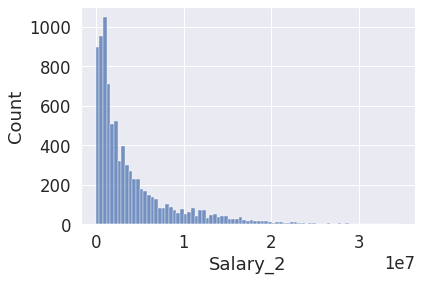

In [ ]:
sns.histplot(x=df_ps_2.Salary_2)

Label Encoder para transforma varibles 'country' y 'team_abbreviation'

In [ ]:
df_ps_2['country'].value_counts()

USA           7323
France         121
Canada          97
Spain           65
Brazil          62
              ... 
Ireland          2
Macedonia        1
Egypt            1
Sudan (UK)       1
Gabon            1
Name: country, Length: 70, dtype: int64

In [ ]:
# Reconvertir categorias para hacerlas reducidas y disminuir ruido
df_ps_2['country'] = [x if x in df_ps_2['country'].value_counts()[0:9].index else 'Otro' for x in df_ps_2['country']]

In [ ]:
df_ps_2['country'].value_counts()

USA          7323
Otro          771
France        121
Canada         97
Spain          65
Brazil         62
Argentina      57
Turkey         53
Slovenia       52
Croatia        47
Name: country, dtype: int64

In [ ]:
df_ps_2['team_abbreviation'].value_counts()

CLE    333
MIL    323
GSW    319
LAC    319
MIN    317
WAS    315
TOR    311
ATL    311
LAL    306
DEN    302
SAC    299
ORL    294
DAL    293
DET    291
POR    286
SAS    277
UTA    275
MIA    274
BOS    268
PHI    267
CHI    265
MEM    263
IND    263
NYK    261
PHX    253
HOU    253
NJN    249
SEA    171
OKC    152
NOH    132
BKN    101
NOP     89
VAN     65
CHA     64
CHH     56
NOK     31
Name: team_abbreviation, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
OHE1=['country', 'team_abbreviation']
ohe1= LabelEncoder()
df_ps_2[OHE1]=df_ps_2[OHE1].apply(ohe1.fit_transform)
df_ps_2.head()

,net_rating,gp,pts,team_abbreviation,country,player_name,ast,age,Salary,reb,player_height,Name+season,Salary_2
111,-8.0,83,7.2,7,9,A.C. Green,0.8,33.0,$ 4.851.000.00,7.9,205.74,A.C. Green_1996,4851000.0
841,-5.6,50,4.9,7,9,A.C. Green,0.5,35.0,$ 5.125.088.00,4.6,205.74,A.C. Green_1998,5125088.0
1185,8.1,82,5.0,14,9,A.C. Green,1.0,36.0,$ 1.700.000.00,5.9,205.74,A.C. Green_1999,1700000.0
1490,3.3,82,4.5,16,9,A.C. Green,0.5,37.0,$ 2.250.000.00,3.8,205.74,A.C. Green_2000,2250000.0
1049,-32.6,8,1.0,6,9,A.J. Bramlett,0.0,23.0,$ 118.974.00,2.8,208.28,A.J. Bramlett_1999,118974.0


In [ ]:
df_ps_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8648 entries, 111 to 4884
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   net_rating         8648 non-null   float64
 1   gp                 8648 non-null   int64  
 2   pts                8648 non-null   float64
 3   team_abbreviation  8648 non-null   int64  
 4   country            8648 non-null   int64  
 5   player_name        8648 non-null   object 
 6   ast                8648 non-null   float64
 7   age                8648 non-null   float64
 8   Salary             8648 non-null   object 
 9   reb                8648 non-null   float64
 10  player_height      8648 non-null   float64
 11  Name+season        8648 non-null   object 
 12  Salary_2           8648 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 945.9+ KB


### Creación de variable objetivo
Creamos una variable a partir de la medía del salario para tomarla como objetivo

In [ ]:
#Creamos una variable a partir del salario para tomar como target

df_ps_2['Salary_level'] = df_ps_2['Salary_2'].apply(lambda x: 0 if x >2.250000e+06 else 1)
df_ps_2['Salary_level'].describe()

count    8648.000000
mean        0.501850
std         0.500025
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Salary_level, dtype: float64

##Training and testing

### Definción de X e y

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# partiendo de df_ps_2 solo nos quedamos con la variables númericas más significativas

df_ps_2_n = df_ps_2[['age', 'player_height', 'gp', 'pts' , 'reb' , 'ast', 'net_rating','Salary_2', 'team_abbreviation'  ]]
X = df_ps_2[['age', 'player_height', 'gp', 'pts' , 'reb' , 'ast', 'net_rating',  'country', 'team_abbreviation' ]]
y =df_ps_2['Salary_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Algoritmos de Clasificación

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=70,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=70, random_state=42)

In [ ]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       837
           1       0.90      0.90      0.90       893

    accuracy                           0.90      1730
   macro avg       0.90      0.90      0.90      1730
weighted avg       0.90      0.90      0.90      1730



Text(0.5, 0, 'Random Forest Feature Importance')

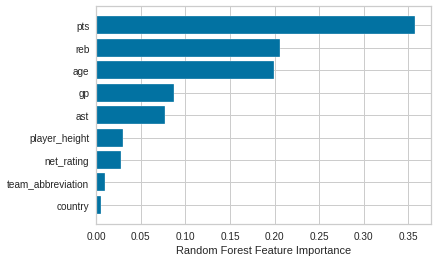

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = clf.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_score1))

roc_auc_score for RandomForestClassifier:  0.9700618510357338


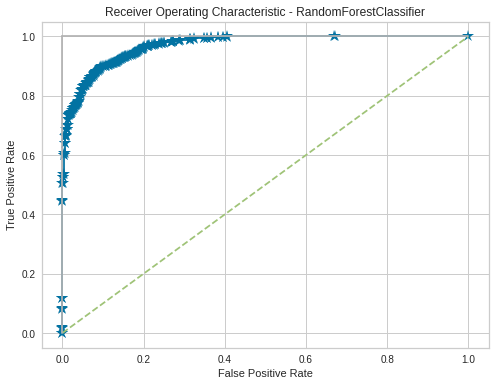

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=12)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVC - Support Vector Machines

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       910
           1       0.72      0.80      0.76       820

    accuracy                           0.76      1730
   macro avg       0.76      0.76      0.76      1730
weighted avg       0.76      0.76      0.76      1730



### KNN KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_test=neigh.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       811
           1       0.86      0.85      0.86       919

    accuracy                           0.85      1730
   macro avg       0.85      0.85      0.85      1730
weighted avg       0.85      0.85      0.85      1730



### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [ ]:
y_test=clf.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       837
           1       0.98      0.99      0.99       893

    accuracy                           0.99      1730
   macro avg       0.99      0.99      0.99      1730
weighted avg       0.99      0.99      0.99      1730



## Clustering

In [ ]:
#Estandarización de variables previa a los algoritmos de clustering
from sklearn.preprocessing import StandardScaler
#sklearn.utils.check_random_state(1000)
stdsc_2 = StandardScaler()
df_ps_2_n_ss = stdsc_2.fit_transform(df_ps_2_n)
df_ps_2_n_ss = df_ps_2[['age',  'gp', 'pts' , 'reb' , 'ast','Salary_2'   ]]

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils


In [ ]:
# DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(df_ps_2_n_ss)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels_DB = db.labels_
df_ps_2_n['labels_DB'] = labels_DB


<ipython-input-43-6f9ca28e5991>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps_2_n['labels_DB'] = labels_DB


In [ ]:
df_ps_2_n['labels_DB'].value_counts()

-1    8648
Name: labels_DB, dtype: int64

### K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans.fit(df_ps_2_n_ss)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[2.70078980e+01, 5.21691839e+01, 6.94294028e+00, 3.17881391e+00,
        1.56928086e+00, 2.29903304e+06],
       [2.93312369e+01, 6.43927324e+01, 1.46311670e+01, 5.80740741e+00,
        3.21250874e+00, 1.28461104e+07]])

In [ ]:
labels_KM = kmeans.labels_
labels_KM

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
!pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


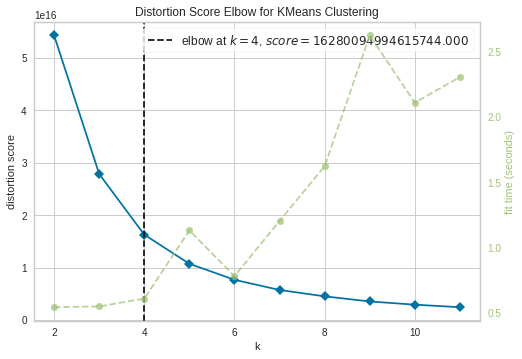

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df_ps_2_n_ss)  
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(df_ps_2_n_ss) #Entrenamos el modelo

KMeans(n_clusters=4, random_state=42)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


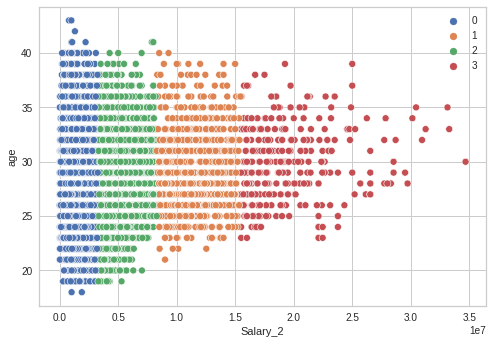

In [ ]:
sns.scatterplot( df_ps_2_n.Salary_2, df_ps_2_n.age, hue = kmeans.labels_, palette = "deep" )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


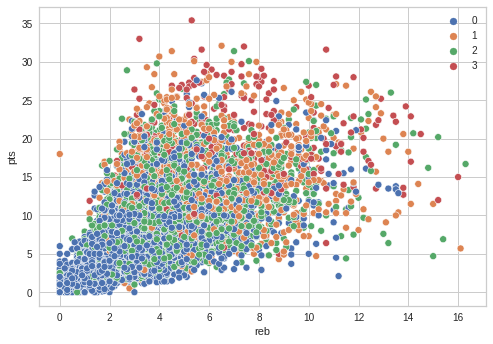

In [ ]:
sns.scatterplot( df_ps_2_n.reb, df_ps_2_n.pts, hue = kmeans.labels_, palette = "deep" )

##Optimización

In [ ]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Para n_clusters = 2 El promedio del score de silhouette es:  0.7361530397801435
Para n_clusters = 3 El promedio del score de silhouette es:  0.6573196891523362
Para n_clusters = 4 El promedio del score de silhouette es:  0.6347673032257467
Para n_clusters = 5 El promedio del score de silhouette es:  0.6112649840105328
Para n_clusters = 6 El promedio del score de silhouette es:  0.599537440436878


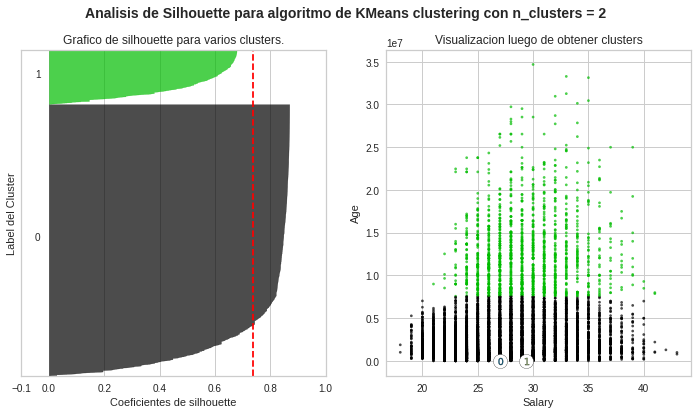

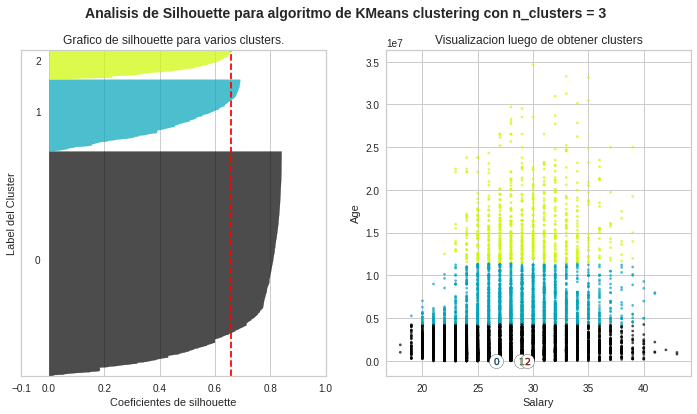

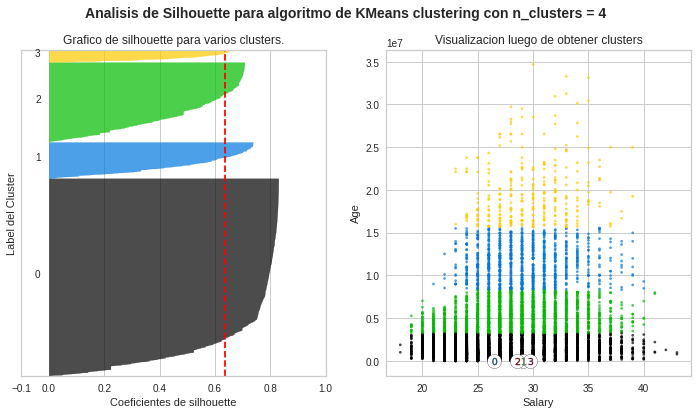

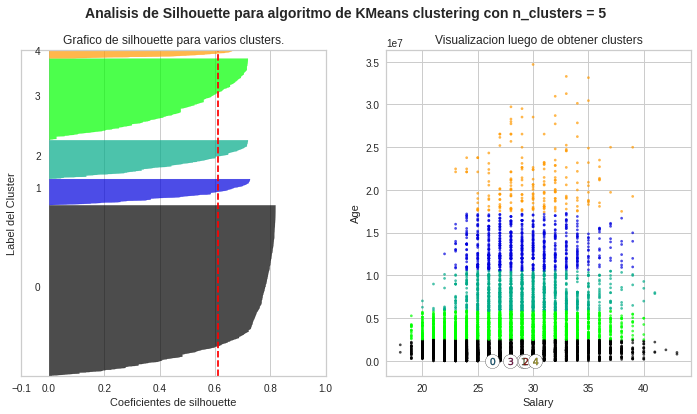

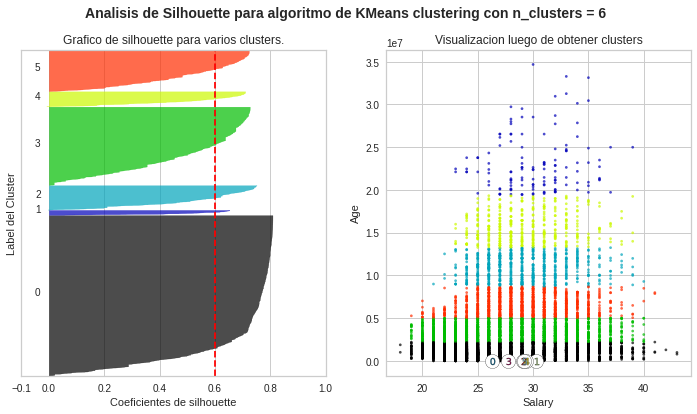

In [ ]:
X = df_ps_2_n_ss
for n_clusters in range(2, 7):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    # El 1 subplot es para el score de silhouette 
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(df_ps_2_n_ss)
    # El score de silhouette_score da el promedio de todos los valores 
    silhouette_avg = silhouette_score(df_ps_2_n_ss, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra 
    sample_silhouette_values = silhouette_samples(df_ps_2_n_ss, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10 
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion
# 2 grafica mostrando los clusters formados 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(df_ps_2_n.age, df_ps_2_n.Salary_2, marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Salary")
    ax2.set_ylabel("Age")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

plt.show()

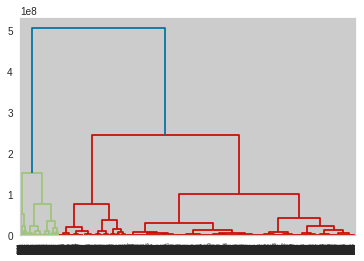

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage

Z2 = linkage(df_ps_2_n_ss, method='ward', metric='euclidean')
dendrogram(Z2)
plt.show()

### Grid Search

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score

params_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' :[42],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

# tiempo de ejecucion 1min
grid_cv = GridSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=5)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

KeyboardInterrupt: ignored

### Randomized Search CV

In [ ]:
# tiempo de ejecucuon 12 seg
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'random_state': 42, 'n_estimators': 500, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'entropy'}
Mejor score de CV 0.7732003469210754
Accuracy del modelo = 0.88555


##Selección de módelos

##Conclusiones


*   **Clasificación de nivel de salarios:**
A la hora de elegir el mejor modelo para clasificiación es sin lugar a duda la regresión logística. Teniendo en en cuenta que "y" es una variable binaria perfectamente balanceada, el mencionado es el mejor algoritmo.
* **  Clusterización de judares:**
Sobre la clusterización de jugadores en el K-Mean con K = 4 es la mejor opción.
